In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Part 1 &mdash; improving the examples

**Fix labels to be 1Y, 2Y, etc. (instead of 1J, 2J)**

In [2]:
# Read in the data
df = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
df.head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


We can do this by correcting the names of the columns in our data frame.

In [3]:
# Fix the labels by correcting the column labels
df.columns = [c.replace('J', 'Y') for c in df.columns]
cols = ["{}Y".format(idx) for idx in range(1, 11)]
cols.extend(['20Y', '30Y'])
df = df[cols]
df.columns.name='Yield'

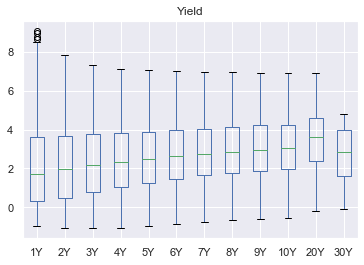

In [4]:
# Plot the boxplot -- See labels are fixed
ax = df.boxplot()
ax.set_title('Yield')
None

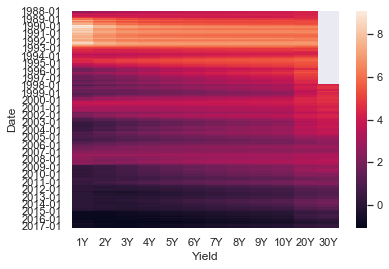

In [5]:
# Plot the heatmap -- labels are fixed here as well.
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, yticklabels=labels)

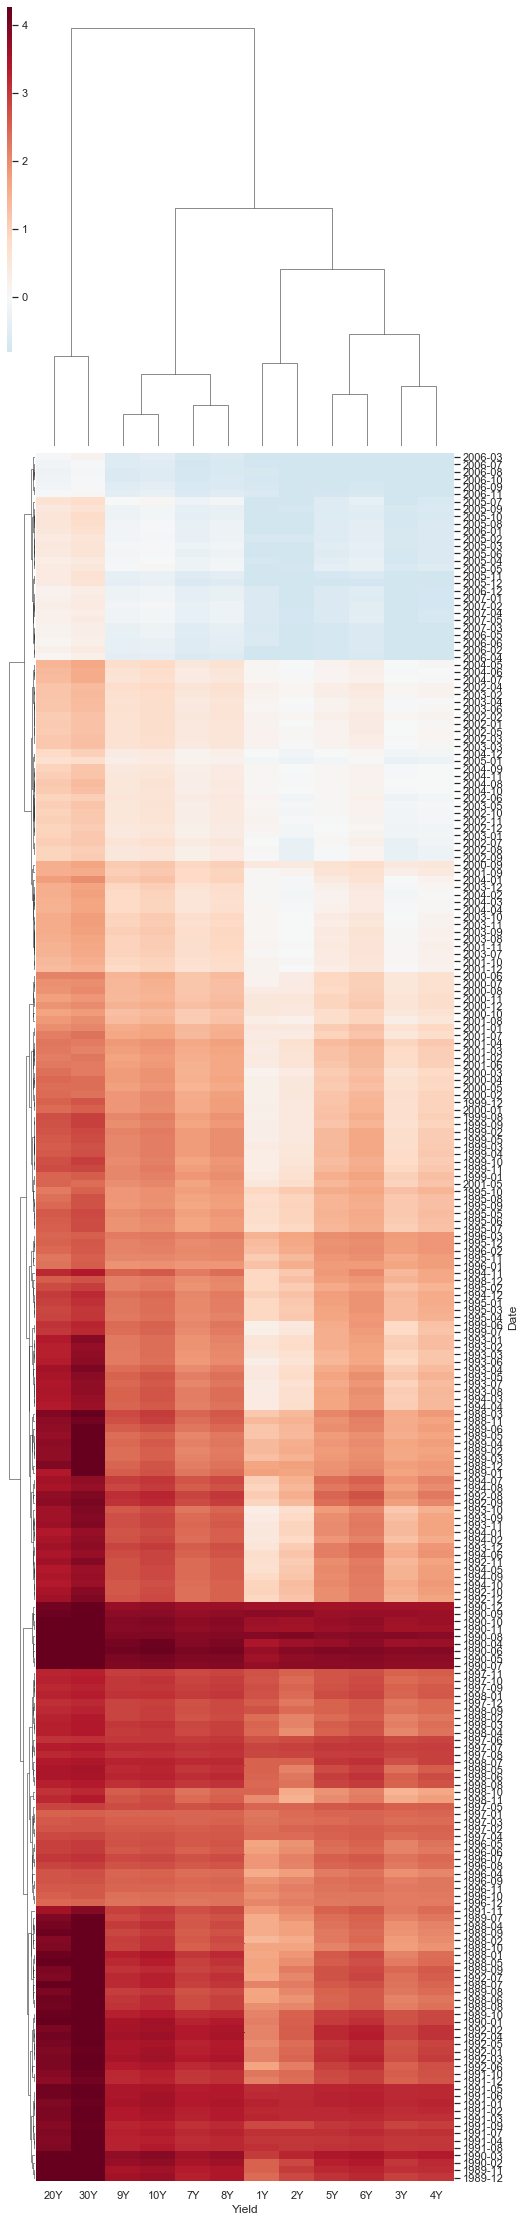

In [6]:
# dendrograms with labels fixed
labels = [t.strftime("%Y-%m") for t in df.index]
cg = sns.clustermap(df.dropna(), yticklabels=labels, robust=True, figsize=(8, 40), center=0, cmap='RdBu_r')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

# Part 2 &mdash; work with new data

In [7]:
df = pd.read_csv("../data/snb-data-zimoma-en-all-20170502_1430.csv")
df.head()

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.0
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN


In [8]:
df.dtypes

Date      object
D0        object
Value    float64
dtype: object

In [9]:
pd.unique(df['D0'])

array(['SARON', '1TGT', 'EG3M', '1M', '3M0', '6M', '12M', '3M1', '3M2',
       '3M3', '3M4'], dtype=object)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
tdf = df.set_index(['Date', 'D0']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
tdf = tdf[term_order]
tdf.head()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


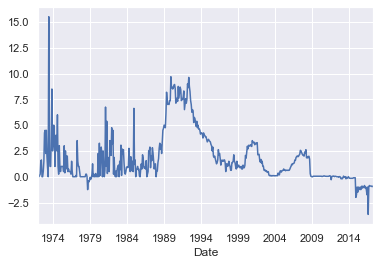

In [11]:
# line chart of 1TGT series
tdf['1TGT'].plot()

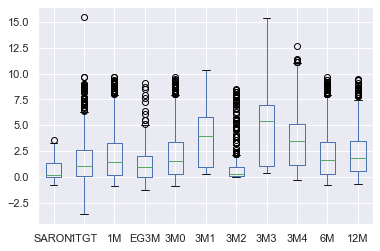

In [12]:
# boxplots of all series
tdf.plot.box()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


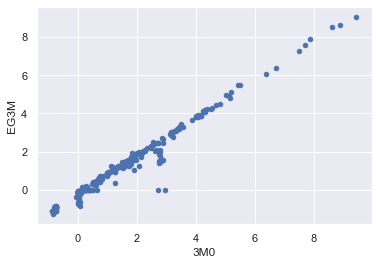

In [13]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', 'EG3M'
tdf.plot.scatter('3M0', 'EG3M')
None

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


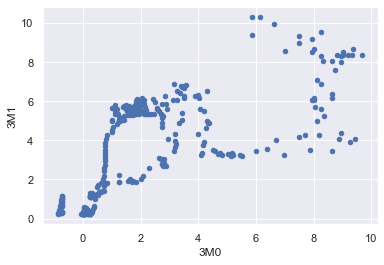

In [14]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M1'
tdf.plot.scatter('3M0', '3M1')
None

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


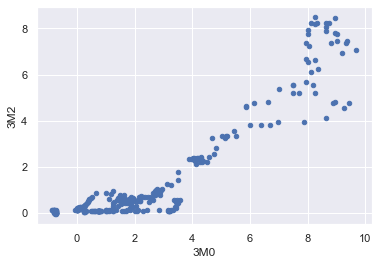

In [15]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M2'
tdf.plot.scatter('3M0', '3M2')
None

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


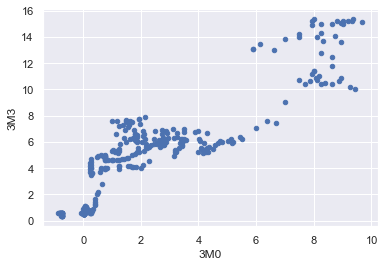

In [16]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M3'
tdf.plot.scatter('3M0', '3M3')
None

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


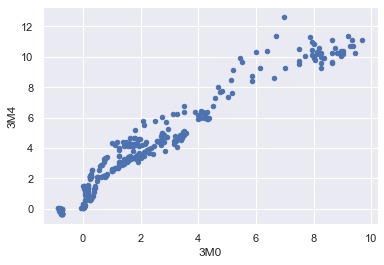

In [17]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M4'
tdf.plot.scatter('3M0', '3M4')
None

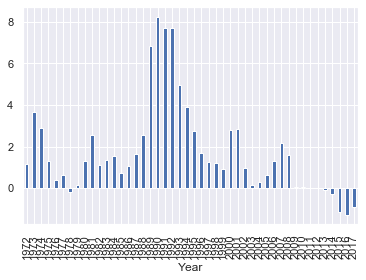

In [18]:
# vertical bar plot of avg 1TGT rates per year
ttdf = tdf.copy()
ttdf['Year'] = [idx.year for idx in tdf.index]
ttdf.groupby('Year').mean()['1TGT'].plot.bar(color=sns.color_palette()[0])
None

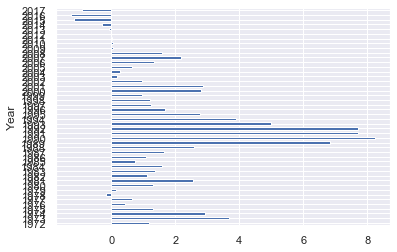

In [19]:
# horizontal bar plot of avg 1TGT rates per year
ttdf = tdf.copy()
ttdf['Year'] = [idx.year for idx in tdf.index]
ttdf.groupby('Year').mean()['1TGT'].plot.barh(color=sns.color_palette()[0])
None

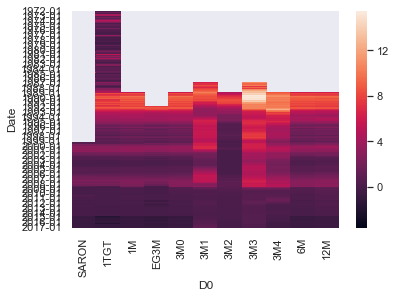

In [20]:
# heatmap of all money-market rates
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(tdf.index)]
ax = sns.heatmap(tdf, yticklabels=labels)

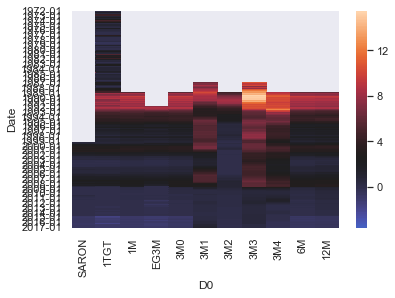

In [21]:
# heatmap of all money-market rates (with color map centered)
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(tdf.index)]
ax = sns.heatmap(tdf, yticklabels=labels, center=tdf.stack().mean())

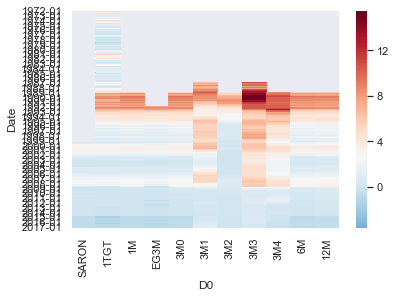

In [22]:
# heatmap of all money-market rates (with color map centered, using alternate cmap)
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(tdf.index)]
ax = sns.heatmap(tdf, yticklabels=labels, center=tdf.stack().mean(), cmap='RdBu_r')

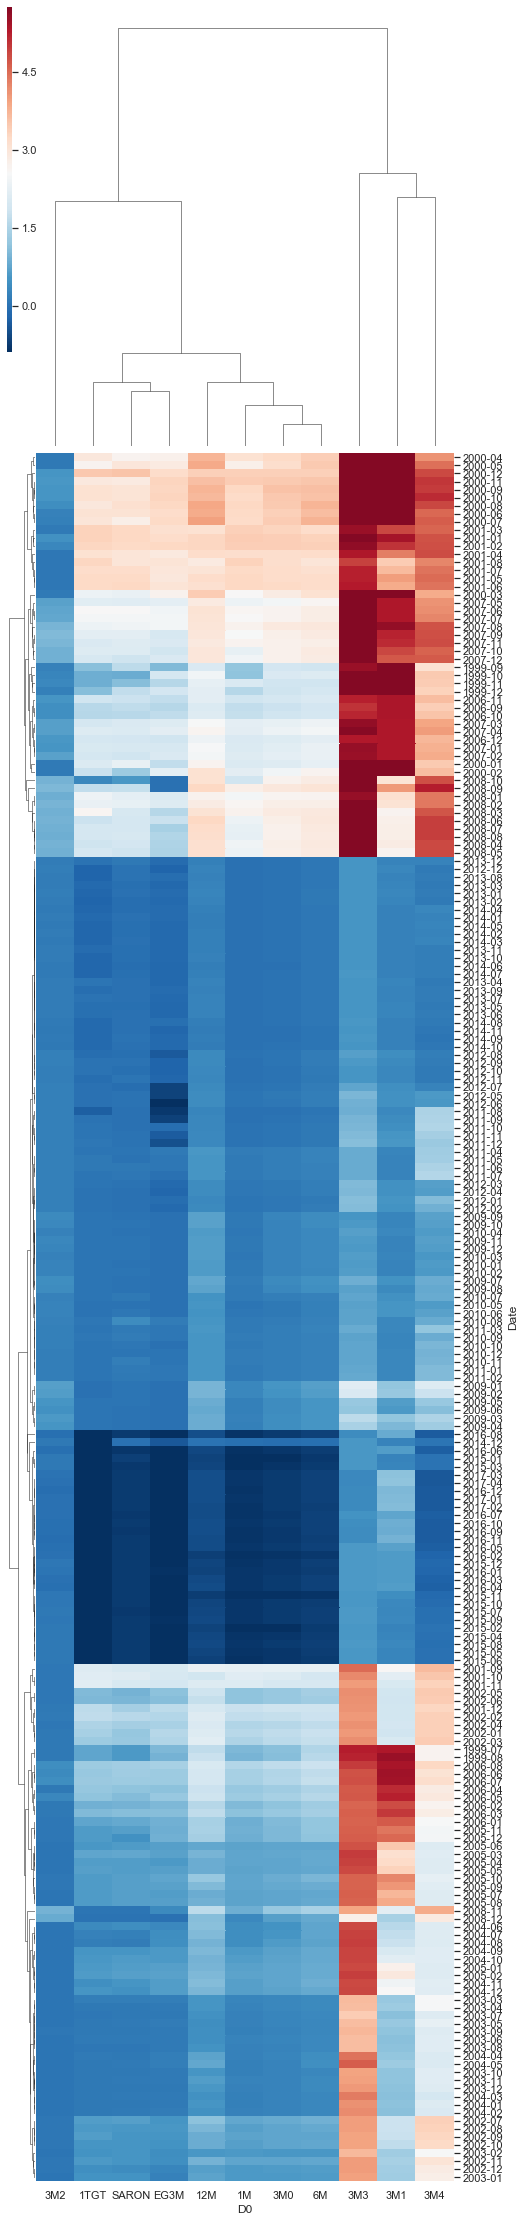

In [23]:
# clustered heatmap of all money-market rates
labels = [t.strftime("%Y-%m") for i, t in enumerate(tdf.dropna().index)]
cg = sns.clustermap(tdf.dropna(), yticklabels=labels, robust=True, center=tdf.stack().mean(), cmap='RdBu_r', figsize=(8, 40))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

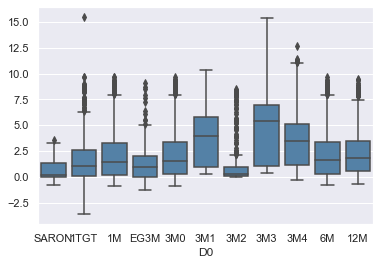

In [24]:
# boxplots with outliers
sns.boxplot(data=tdf, color='steelblue');

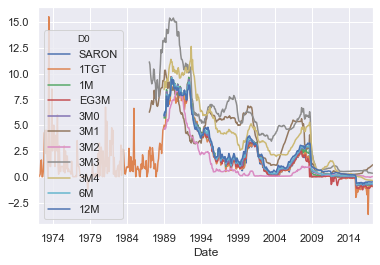

In [25]:
# time-series plots of all series
_ = tdf.plot()

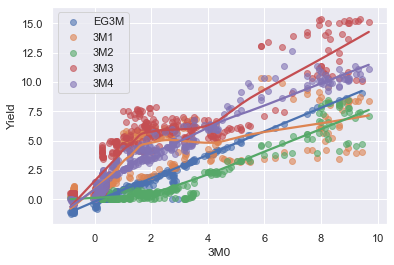

In [26]:
# scatter plot of 3M0 vs. EG3M and 3M[1..4], with LOWESS trend
fig, ax = plt.subplots()
scatter_kws = {'alpha': 0.6}
sns.regplot(x='3M0', y='EG3M', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="EG3M")
sns.regplot(x='3M0', y='3M1', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M1")
sns.regplot(x='3M0', y='3M2', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M2")
sns.regplot(x='3M0', y='3M3', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M3")
sns.regplot(x='3M0', y='3M4', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M4")
ax.set_ylabel("Yield")
ax.legend()
None

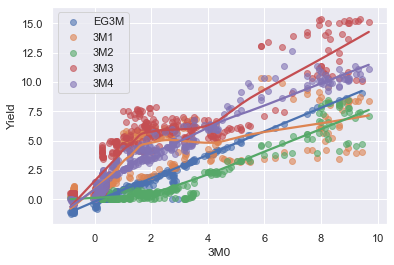

In [27]:
# scatter plot of 3M0 vs. EG3M and 3M1, with LOWESS trend -- more compact
fig, ax = plt.subplots()
scatter_kws = {'alpha': 0.6}
sns.regplot(x='3M0', y='EG3M', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="EG3M")
for i in range (1, 5):
    var = '3M{}'.format(i)
    sns.regplot(x='3M0', y=var, lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label=var)
ax.set_ylabel("Yield")
ax.legend()
None

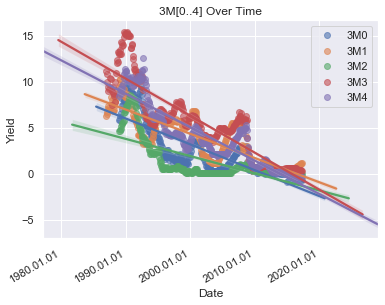

In [28]:
# scatter plot of 3M[0..4] over time with regression, dates nicely formatted
import matplotlib.dates as mdates
fix, ax = plt.subplots()
ttdf = tdf.reset_index()
ttdf['Date'] = ttdf['Date'].apply(lambda x: mdates.date2num(x))
scatter_kws = {'alpha': 0.6}
for i in range (0, 5):
    var = '3M{}'.format(i)
    sns.regplot(x='Date', y=var, data=ttdf, ax=ax, scatter_kws=scatter_kws, label=var)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_title("3M[0..4] Over Time")
ax.set_ylabel("Yield")
ax.legend()
None